In [1]:
library(e1071)
library(ggplot2)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [2]:
cc <- read.csv("C:/Users/akhil/Downloads/UCI_Credit_Card.csv")
head(cc)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [3]:
cc$default.payment.next.month <- factor(cc$default.payment.next.month,levels=c(0,1), labels=c("No","Yes"))

In [4]:
head(cc)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,No


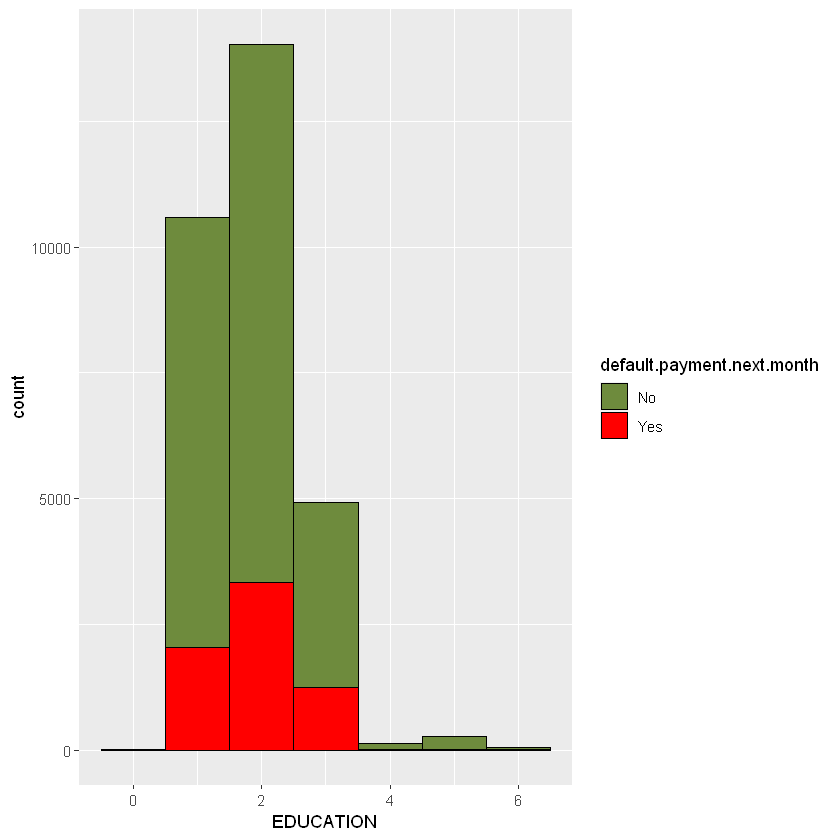

In [5]:
ggplot(cc, aes(x=EDUCATION, fill=default.payment.next.month, color=default.payment.next.month)) + 
  geom_histogram(binwidth=1, position="stack") +
  scale_color_manual(values=c("black","black")) +
  scale_fill_manual(values=c("darkolivegreen4", "red"))

# A.2. Demographic Variables
Based on the histogram (education), we can conclude that students with a level of education between graduate, university, and high school, have credit card defaults, and that a large number of students are qualified to use credit cards and pay bills. Observing the histogram, we can deduce that the education category plays an essential part in the development of the model, as individuals with 1 to 3 years of schooling are more likely to pay their credit card payments on time or default.

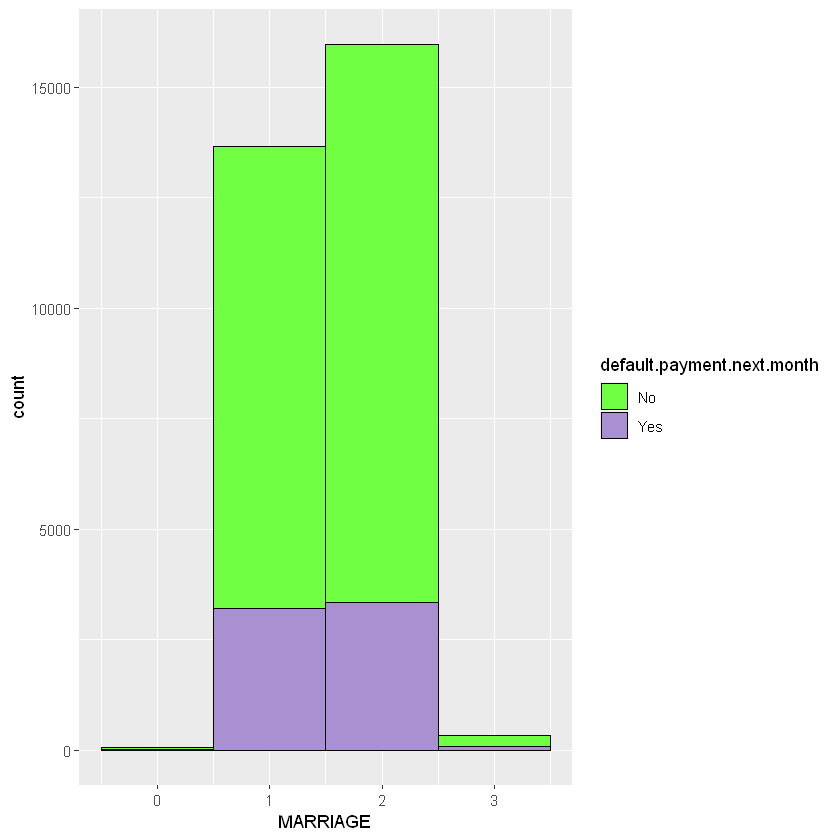

In [6]:
ggplot(cc, aes(x=MARRIAGE, fill=default.payment.next.month, color=default.payment.next.month)) + 
  geom_histogram(binwidth=1, position="stack") +
  scale_color_manual(values=c("black","black")) +
  scale_fill_manual(values=c("#71FF43", "#A990D1"))

This marriage histogram is used for the development of the model as it has majority data in columns 1 and 2, indicating that the most of married individuals pay their credit card payments and just a few are defaulters. This variable may be used to forecast the default.payment.next.month.

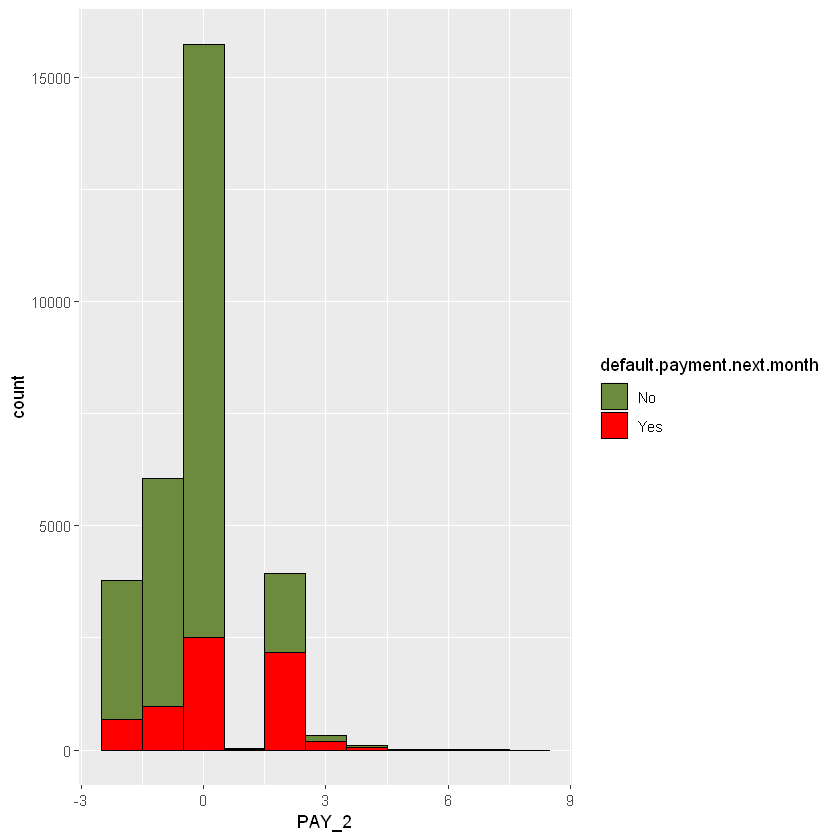

In [7]:
ggplot(cc, aes(x=PAY_2, fill=default.payment.next.month, color=default.payment.next.month)) + 
  geom_histogram(binwidth=1, position="stack") +
  scale_color_manual(values=c("black","black")) +
  scale_fill_manual(values=c("darkolivegreen4", "red"))

PAY_2 indicates the repayment status as of August 2005. Over seventy-five percent of payments were made on time, and the most of those who defaulted had payments that had been overdue for more than two months.

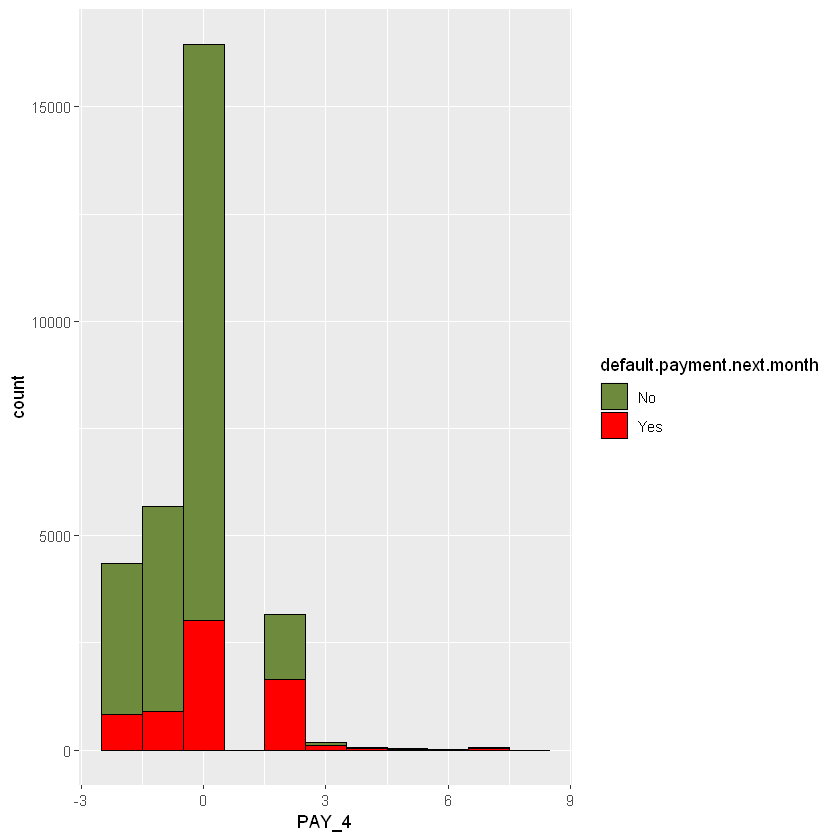

In [8]:
ggplot(cc, aes(x=PAY_4, fill=default.payment.next.month, color=default.payment.next.month)) + 
  geom_histogram(binwidth=1, position="stack") +
  scale_color_manual(values=c("black","black")) +
  scale_fill_manual(values=c("darkolivegreen4", "red"))

PAY_4 indicates the repayment status as of June 2005. Over seventy-five percent of payments were made on time, and the most of those who defaulted had payments that had been overdue for more than two months.

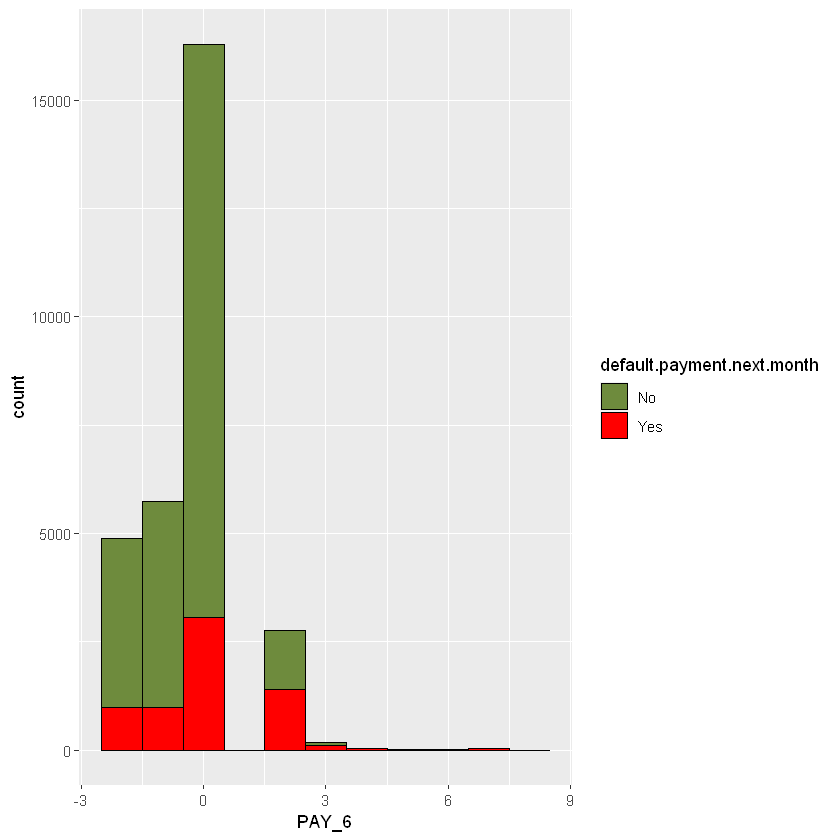

In [9]:
ggplot(cc, aes(x=PAY_6, fill=default.payment.next.month, color=default.payment.next.month)) + 
  geom_histogram(binwidth=1, position="stack") +
  scale_color_manual(values=c("black","black")) +
  scale_fill_manual(values=c("darkolivegreen4", "red"))

PAY_6 indicates the repayment status as of April 2005. Over seventy-five percent of payments were made on time, and the most of those who defaulted had payments that had been overdue for more than two months.

# A.4. Transforming Nominal Variables
Here, there are 3 demographic variables are there:- 
SEX, 
EDUCATION,
MARRIAGE.
These variables are transformed into nominal values by using factor.

In [10]:
cc$SEX <- factor(cc$SEX,levels=c(1,2), labels=c("Male", "Female")) 

In [11]:
head(cc)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,Female,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
2,120000,Female,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
3,90000,Female,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
4,50000,Female,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
5,50000,Male,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
6,50000,Male,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,No


In [12]:
cc$EDUCATION <- factor(cc$EDUCATION,levels=c(1,2,3,4,5,6), labels=c("graduate_school", "university","high_school","others","unknown","unknown")) 
head(cc)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,Female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
2,120000,Female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
3,90000,Female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
4,50000,Female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
5,50000,Male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
6,50000,Male,graduate_school,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,No


In [13]:
cc$MARRIAGE <- factor(cc$MARRIAGE,levels=c(1,2,3), labels=c("married", "single","others")) 


In [14]:
head(cc)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,Female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
2,120000,Female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
3,90000,Female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
4,50000,Female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
5,50000,Male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
6,50000,Male,graduate_school,single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,No


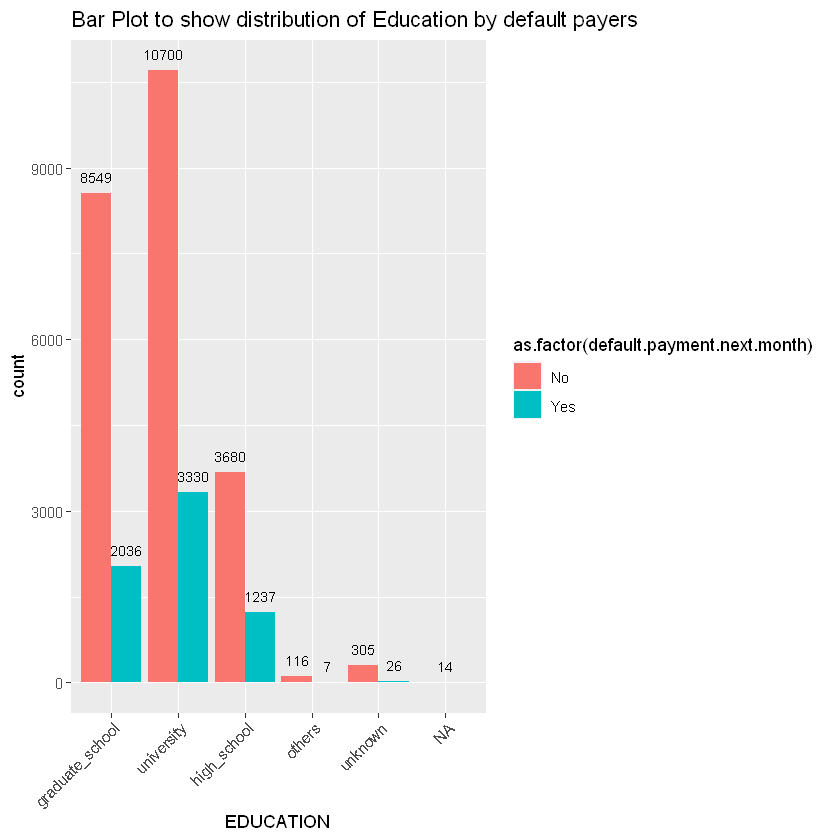

In [15]:
education<-ggplot(data=cc, aes(x=EDUCATION, fill = as.factor(default.payment.next.month)))    +geom_bar(position="dodge")  + 
  geom_text(stat='count', aes(label=..count.., vjust = -1), size = 3, position = position_dodge(width=.9))+
 ggtitle("Bar Plot to show distribution of Education by default payers")+ theme(axis.text.x = element_text(angle = 45,hjust=1))
education

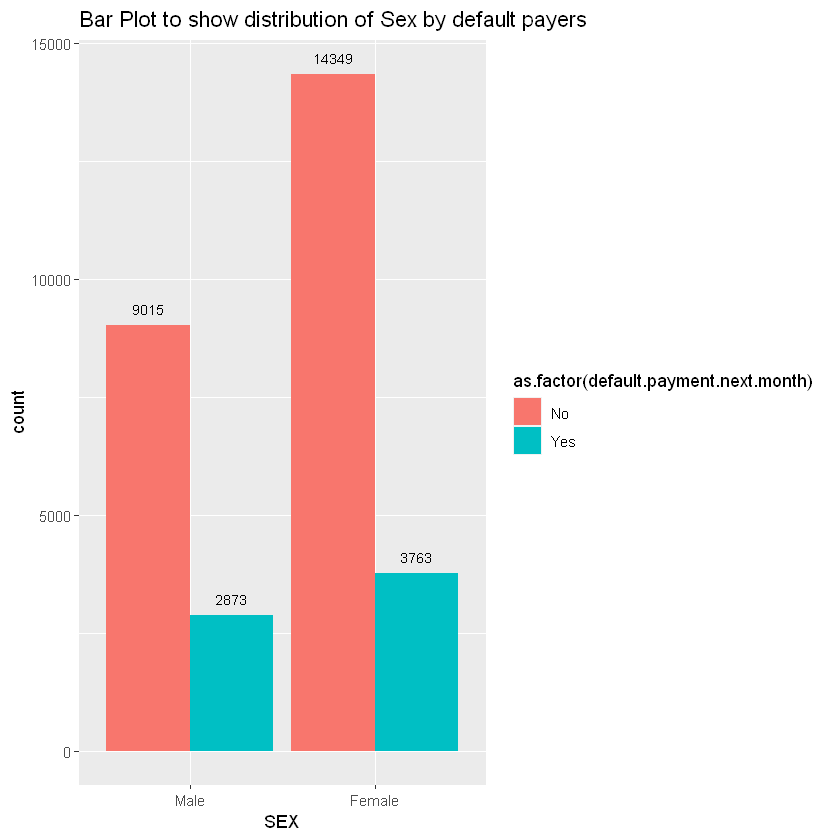

In [16]:
sex_class<-ggplot(data=cc, aes(x=SEX, fill = as.factor(default.payment.next.month)))    +geom_bar(position="dodge")  + 
  geom_text(stat='count', aes(label=..count.., vjust = -1), size = 3, position = position_dodge(width=.9))+
ggtitle("Bar Plot to show distribution of Sex by default payers")

sex_class

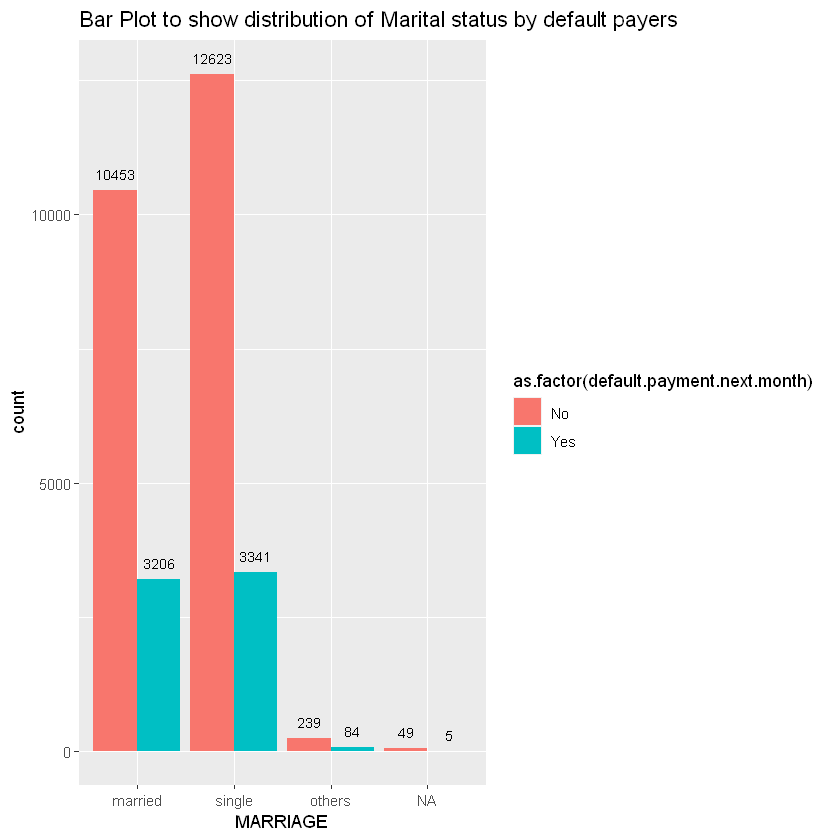

In [17]:
marriage_class<-ggplot(data=cc, aes(x=MARRIAGE, fill = as.factor(default.payment.next.month)))    +geom_bar(position="dodge")  + 
  geom_text(stat='count', aes(label=..count.., vjust = -1), size = 3, position = position_dodge(width=.9))+
ggtitle("Bar Plot to show distribution of Marital status by default payers")

marriage_class

In [18]:
cc$PAY_0 <- factor(cc$PAY_0,levels=c(-2,-1,0,1,2,3,4,5,6,7,8), labels=c("pay duly", "pay duly", "pay duly",
                                                                          "delay 1 mo","delay 2 mo","delay 3 mo",
                                                                          "delay 4 mo","delay 5 mo","delay 6 mo",
                                                                          "delay 7 mo","delay 8 mo"))

cc$PAY_2 <- factor(cc$PAY_2,levels=c(-2,-1,0,1,2,3,4,5,6,7,8), labels=c("pay duly", "pay duly", "pay duly",
                                                                          "delay 1 mo","delay 2 mo","delay 3 mo",
                                                                          "delay 4 mo","delay 5 mo","delay 6 mo",
                                                                          "delay 7 mo","delay 8 mo"))

cc$PAY_3 <- factor(cc$PAY_3,levels=c(-2,-1,0,1,2,3,4,5,6,7,8), labels=c("pay duly", "pay duly", "pay duly",
                                                                          "delay 1 mo","delay 2 mo","delay 3 mo",
                                                                          "delay 4 mo","delay 5 mo","delay 6 mo",
                                                                          "delay 7 mo","delay 8 mo"))
cc$PAY_4 <- factor(cc$PAY_4,levels=c(-2,-1,0,1,2,3,4,5,6,7,8), labels=c("pay duly", "pay duly", "pay duly",
                                                                          "delay 1 mo","delay 2 mo","delay 3 mo",
                                                                          "delay 4 mo","delay 5 mo","delay 6 mo",
                                                                          "delay 7 mo","delay 8 mo"))
cc$PAY_5 <- factor(cc$PAY_5,levels=c(-2,-1,0,1,2,3,4,5,6,7,8), labels=c("pay duly", "pay duly", "pay duly",
                                                                          "delay 1 mo","delay 2 mo","delay 3 mo",
                                                                          "delay 4 mo","delay 5 mo","delay 6 mo",
                                                                          "delay 7 mo","delay 8 mo"))
cc$PAY_6 <- factor(cc$PAY_6,levels=c(-2,-1,0,1,2,3,4,5,6,7,8), labels=c("pay duly", "pay duly", "pay duly",
                                                                          "delay 1 mo","delay 2 mo","delay 3 mo",
                                                                          "delay 4 mo","delay 5 mo","delay 6 mo",
                                                                          "delay 7 mo","delay 8 mo"))

# A.5. Selection of Training Data 
Selected random rows and assigned it to variable train.<br>
Used nrow(train) to check the data. We can use View(train)

In [19]:
train <- cc[sample(nrow(cc), 5000), ] 

In [20]:
head(train)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
14577,14577,110000,Female,university,single,25,delay 1 mo,delay 2 mo,delay 2 mo,pay duly,...,102111,101521,100240,8000,0,4000,4000,3600,3500,No
15244,15244,290000,Female,university,single,34,pay duly,pay duly,pay duly,pay duly,...,38441,37454,35484,2000,2000,2000,2000,2000,2000,No
25739,25739,180000,Female,graduate_school,single,34,pay duly,pay duly,pay duly,pay duly,...,94820,100740,99015,5000,5000,5000,7500,0,6000,Yes
8921,8921,50000,Male,university,married,38,pay duly,pay duly,pay duly,pay duly,...,19418,19315,18559,1372,1286,666,680,816,819,No
10753,10753,470000,Male,university,married,32,pay duly,pay duly,pay duly,pay duly,...,148871,152309,155769,7000,6000,6000,6000,6000,8000,No
697,697,50000,Female,graduate_school,married,34,pay duly,pay duly,pay duly,pay duly,...,6611,7349,7570,1267,1553,7511,1000,343,1000,No


In [21]:
test <- cc[c(254,25358,67,7437),]
head(test)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
254,254,160000,Female,graduate_school,single,28,pay duly,pay duly,pay duly,pay duly,...,7222,99669,84426,7042,2000,1000,99669,12600,10000,No
25358,25358,180000,Female,graduate_school,single,25,pay duly,pay duly,pay duly,pay duly,...,47383,32876,28915,1867,2501,1271,926,876,3004,No
67,67,10000,Male,university,married,56,delay 2 mo,delay 2 mo,delay 2 mo,pay duly,...,4062,4196,4326,2300,0,150,200,200,160,Yes
7437,7437,30000,Female,graduate_school,single,24,delay 2 mo,delay 2 mo,delay 2 mo,pay duly,...,15868,16657,13998,4500,0,1000,1000,668,203,Yes


# B.1. Naive Bayes using Demographic Variables

In [22]:
library(e1071)
nbDem <- naiveBayes(default.payment.next.month ~ SEX + EDUCATION + MARRIAGE, train)
nbDem


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    No    Yes 
0.7814 0.2186 

Conditional probabilities:
     SEX
Y          Male    Female
  No  0.3857179 0.6142821
  Yes 0.4345837 0.5654163

     EDUCATION
Y     graduate_school  university high_school      others     unknown
  No      0.350576184 0.471190781 0.160051216 0.004865557 0.013316261
  Yes     0.314730101 0.499542543 0.182982617 0.000000000 0.002744739

     MARRIAGE
Y        married     single     others
  No  0.45114132 0.53808669 0.01077199
  Yes 0.48532110 0.50091743 0.01376147


In [23]:
predict(nbDem, test)


[1] No No No No
Levels: No Yes

Based on the above probabilities and demographic features, there is a 78% chance that a person will not fail on a credit card payment and a 22% chance that they will fail.
<br>
When considering individual characteristics such as Sex, Education, and Marriage, the probability of defaulting on a credit card payment is highest for the female population; college students are more likely to default than other students; and married and single individuals are equally likely to default on payments.

# B.2. Naive Bayes using Payment Status

In [24]:
nbPay <- naiveBayes(default.payment.next.month ~ PAY_0 + PAY_2 + PAY_5, train)
nbPay


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    No    Yes 
0.7814 0.2186 

Conditional probabilities:
     PAY_0
Y         pay duly   delay 1 mo   delay 2 mo   delay 3 mo   delay 4 mo
  No  0.8674174558 0.0952137190 0.0314819555 0.0035833120 0.0007678526
  Yes 0.4867337603 0.1967063129 0.2625800549 0.0338517841 0.0109789570
     PAY_0
Y       delay 5 mo   delay 6 mo   delay 7 mo   delay 8 mo
  No  0.0005119017 0.0002559509 0.0002559509 0.0005119017
  Yes 0.0018298262 0.0018298262 0.0027447392 0.0027447392

     PAY_2
Y         pay duly   delay 1 mo   delay 2 mo   delay 3 mo   delay 4 mo
  No  0.9165600205 0.0007678526 0.0749936012 0.0051190171 0.0012797543
  Yes 0.6322049405 0.0009149131 0.3110704483 0.0384263495 0.0082342177
     PAY_2
Y       delay 5 mo   delay 6 mo   delay 7 mo   delay 8 mo
  No  0.0005119017 0.0002559509 0.0005119017 0.0000000000
  Yes 0.0027447392 0.0036596523 0.0027447392 0.

In [25]:
predict(nbPay, test)


[1] No  No  Yes Yes
Levels: No Yes

Based on the above probabilities and PAY attributes, there is a 78% possibility that a person will not default on their credit card payment and a 22% chance of defaulting the bill payment.<br>
For PAY_0 persons who pay their bills on time, there is a high probability of defaulting the bill.<br>
For PAY_2 individuals who pay their bills on time,  there are having high probability of defaulting the bill followed by people having payment delay of 2 months.<br>
For PAY 5 persons who pay their bills on time, the likelihood of default is huge.

# B.3. Smoothed Naive Bayes using Payment Status

In [26]:
nbPay <- naiveBayes(default.payment.next.month ~ PAY_0 + PAY_2 + PAY_3, train, laplace=1.5)
predict(nbPay, test)

[1] No  No  Yes Yes
Levels: No Yes

The result is similar to that of a standard Naive Bayes model with Normal PAY parameters; the main difference is that Laplace Transforms have been used to exclude certain variables with zero probability.

# C.1. Basic Decision Tree

In [27]:
library("rpart")
library("rpart.plot")
dfpy <- rpart(default.payment.next.month ~ PAY_0 + PAY_2 + PAY_3,
            method="class",
            data=train, parms=list(split='information'), 
            minsplit=20, cp=0.02)

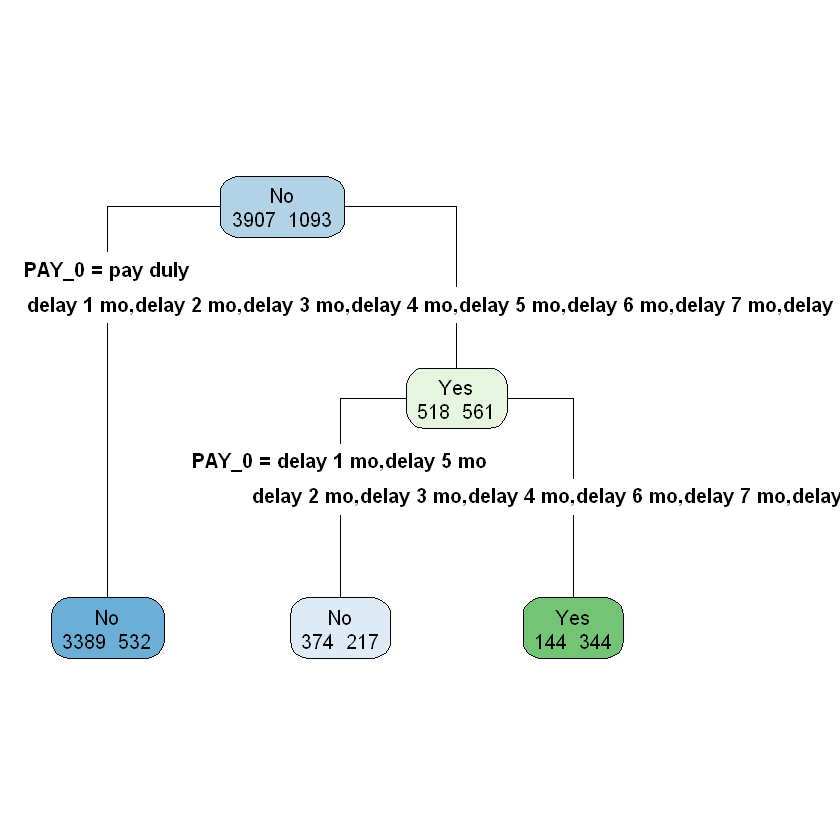

In [28]:
rpart.plot(dfpy, type=4, extra=1)

The decision tree classifier based on payment parameters is displayed above for the provided dataset. Individuals that make payments precisely on the given deadline without even any delays are categorized on the left side of the tree, whereas those with delays of 1,2,3,4,5,6, and 7 months are inclined to default and are classified on the right side of the tree.
Furthermore, there is less likelihood of Default when the delay is between 1 and 5 months as compared to 2, 3, 4, 6 and 7 months.

In [29]:
predict(nbPay, test[2,])


[1] No
Levels: No Yes

# C.2. Decision Tree with a Different Complexity Parameter

In [30]:
dfpy <- rpart(default.payment.next.month ~ PAY_0 + PAY_2 + PAY_3,
            method="class",
            data=train, parms=list(split='information'), 
            minsplit=20, cp=0.001)

[1] No
Levels: No Yes

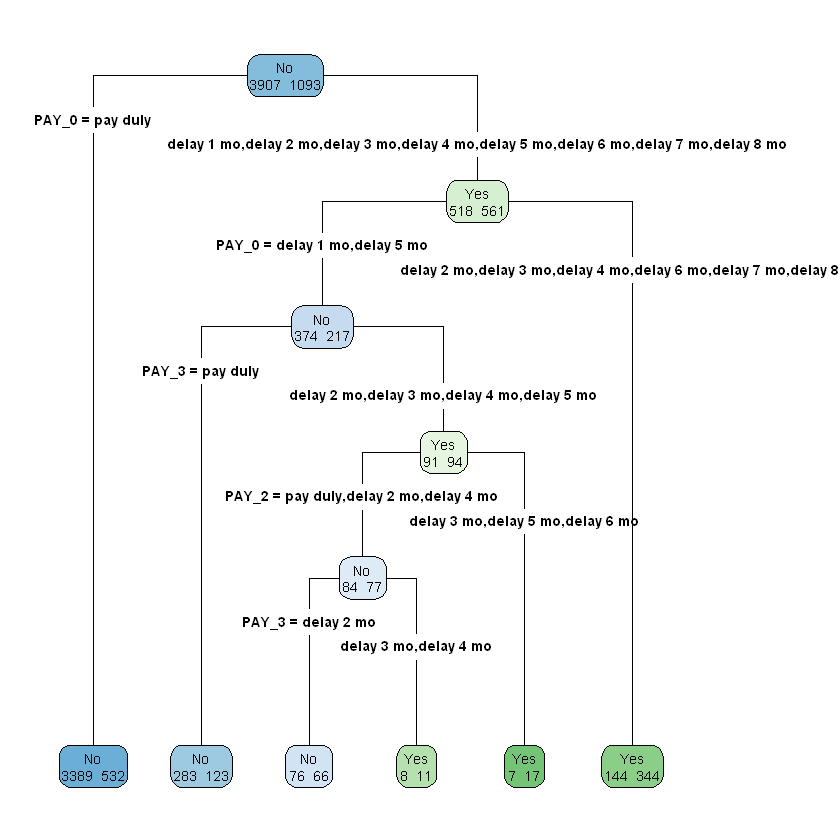

In [31]:
rpart.plot(dfpy, type=4, extra=1)
predict(nbPay, test[2,])


The decision tree classifier based on payment parameters is displayed above for the provided dataset. Individuals that make payments precisely on the given deadline without even any delays are categorized on the left side of the tree, whereas those with delays of 1,2,3,4,5,6,7 and 8 months are inclined to default and are classified on the right side of the tree. 
And, there is a lower likelihood of default when the delay is between 1 and 5 months as compared to 2, 3, 4, 6, 7 and 8 months.Furthermore, delays of between 3 , 5 and 6 months have a high probability of default.



# Conclusion:
In the following research, the trained 2 separate models, Nave Bayes and Decision tree, based on the same data. The naive Bayes classification approach uses probabilities, but the decision tree predict output using a tree-like structure and decision nodes. Because it does not account for their interrelationship, the naive Bayes model assumes that all of the qualities are independent of one another. And also another major difference in both the Nave Bayes model and the decision tree is that when the model is developed using the decision tree, we could see visually how it was constructed and acquire some understanding into the approach, whereas this is not possible with Nave Bayes.
There are several unused properties, such as BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...	PAY_AMT6. These parameters may also be used to train the model. In reality, the more data there is, the more accurate the model is. However, if we give the model every single data point and characteristic, it will take a lot of processing power to train and may end up being too accurate. Before determining which qualities to examine for model creation, we must thus carefully choose the attributes and have some domain knowledge. We may utilize the correlation between the characteristics to determine how much an attribute requires consideration. There are several methods to choose features. We may add these unused characteristics to the model as new attributes, and then we can utilize other strategies to determine which features should be used to train the model. In the aforementioned instance